<h2 align=center>Análise Exploratória dos dados de contatos dos consumidores</h2>

### Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calmap
from pandas_profiling import ProfileReport
%matplotlib inline

### Carregamento dos dados e exploração inicial - Contatos na Aneel

In [2]:
df = pd.read_csv('Base Contatos 2020 TCC.csv', sep = ';', encoding = 'utf-8')

In [3]:
df.head(10)

,Numero_da_Solicitacao,IdAgente,Sigla,UFConc,GrupoEconomico,ClassifAgente,Codigo_Sequencial,Categoria,SubCategoria,Tipologia,Situacao,Decisao,AnoCriacao,MesCriacao,dataref,CodigoMunicipio,Logradouro,Bairro,Cidade,UF
0,102761812019,383,Enel Distribuição Rio de Janeiro,RJ,ENEL,Concessionária,405,Reclamações,Faturamento,Faturamento Microgeração,Encerrada,Improcedente,2020,4,2020-04-30,3301009,AVE RAUL SOUTO MAIOR 321,Centro,CAMPOS DOS GOYTACAZES,RJ
1,102980932087,382,Light,RJ,Cemig-D_Light,Concessionária,106,Reclamações,Faturamento,Variação de Consumo/Consumo Elevado/Erro Leitura,Encerrada,Improcedente,2020,8,2020-08-10,3304557,RuaTaciba N°66,Quintino Bocaiuva,RIO DE JANEIRO,RJ
2,103092272054,26,Energisa Acre,AC,Energisa,Concessionária,332,Informação,Cobranças,Cobrança,Encerrada,Sem decisão,2020,10,2020-10-07,1200401,Luiz Z da Silva,Conjunto Manoel Julião,RIO BRANCO,AC
3,3043342542079,390,Enel Distribuição São Paulo,SP,ENEL,Concessionária,19,Reclamações,Qualidade do Fornecimento,Flutuação/Variação/Oscilação de Tensão,Caminho do Entendimento – Finalizada Ouvidoria,Sem decisão,2020,9,2020-09-22,3550308,RUA VILA DA GALÉ 12 A CASA 01,PERUS,SAO PAULO,SP
4,102658762039,390,Enel Distribuição São Paulo,SP,ENEL,Concessionária,17,Reclamações,Qualidade do Fornecimento,Falta de Energia,Encerrada,Procedente,2020,3,2020-03-05,3550308,RUA MERGENTHALER,VILA LEOPOLDINA,SAO PAULO,SP
5,3043795152043,4950,Cemig-D,MG,Cemig-D_Light,Concessionária,332,Informação,Cobranças,Cobrança,Encerrada,Sem decisão,2020,10,2020-10-16,3129806,Rua Santa Luzia N° 156,Jardim Ibirité,Ibirité,MG
6,102762242020,383,Enel Distribuição Rio de Janeiro,RJ,ENEL,Concessionária,405,Reclamações,Faturamento,Faturamento Microgeração,Encerrada,Improcedente,2020,4,2020-04-30,3301702,Av Automóvel Clube 201,Vila Santa Cruz,DUQUE DE CAXIAS,RJ
7,103024282058,63,CPFL Paulista,SP,CPFL,Concessionária,342,Reclamações,Atendimento,Alteração Cadastral (Titularidade/Nome),Caminho do Entendimento – Finalizada Ouvidoria,Sem decisão,2020,8,2020-08-31,3501905,Avenida Europa N° 1115,Jardim Camandocaia,Amparo,SP
8,1800073242051,382,Light,RJ,Cemig-D_Light,Concessionária,17,Reclamações,Qualidade do Fornecimento,Falta de Energia,Encerrada,Procedente,2020,4,2020-04-16,3304557,André Cusaco,Jardim Guanabara,RIO DE JANEIRO,RJ
9,102748512007,390,Enel Distribuição São Paulo,SP,ENEL,Concessionária,353,Reclamações,Cobranças,"Devolução de Val. Cob. a maior, indev., dupl. ...",Encerrada,Improcedente,2020,4,2020-04-23,3550308,RIO BRANCO- DE 782 AO FIM - LADO PAR,CAMPOS ELISEOS,SAO PAULO,SP


In [4]:
df.columns

Index(['Numero_da_Solicitacao', 'IdAgente', 'Sigla', 'UFConc',
       'GrupoEconomico', 'ClassifAgente', 'Codigo_Sequencial', 'Categoria',
       'SubCategoria', 'Tipologia', 'Situacao', 'Decisao', 'AnoCriacao',
       'MesCriacao', 'dataref', 'CodigoMunicipio', 'Logradouro', 'Bairro',
       'Cidade', 'UF'],
      dtype='object')

In [5]:
df.dtypes

Numero_da_Solicitacao     int64
IdAgente                  int64
Sigla                    object
UFConc                   object
GrupoEconomico           object
ClassifAgente            object
Codigo_Sequencial         int64
Categoria                object
SubCategoria             object
Tipologia                object
Situacao                 object
Decisao                  object
AnoCriacao                int64
MesCriacao                int64
dataref                  object
CodigoMunicipio           int64
Logradouro               object
Bairro                   object
Cidade                   object
UF                       object
dtype: object

In [6]:
df.Numero_da_Solicitacao.count()

952443

In [7]:
df[['Categoria','Numero_da_Solicitacao']].groupby(['Categoria']).agg(['count'])

,Numero_da_Solicitacao
,count
Categoria,
Denúncias,694
Elogio,49
Informação,734993
Reclamações,216559
Sugestão/Crítica,148


C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Categoria', ylabel='count'>

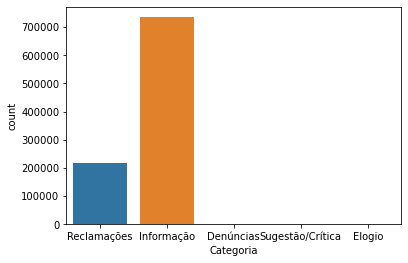

In [17]:
y = df.Categoria
sns.countplot(y,label="Contagem")

In [9]:
df[['SubCategoria','Numero_da_Solicitacao']].groupby(['SubCategoria']).agg(['count'])

,Numero_da_Solicitacao
,count
SubCategoria,
Atendimento,21628
Cobranças,135613
Denúncias,694
Elogio,49
Faturamento,249997
Informações,23987
Qualidade do Fornecimento,265473
Serviços Comerciais,208820


C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


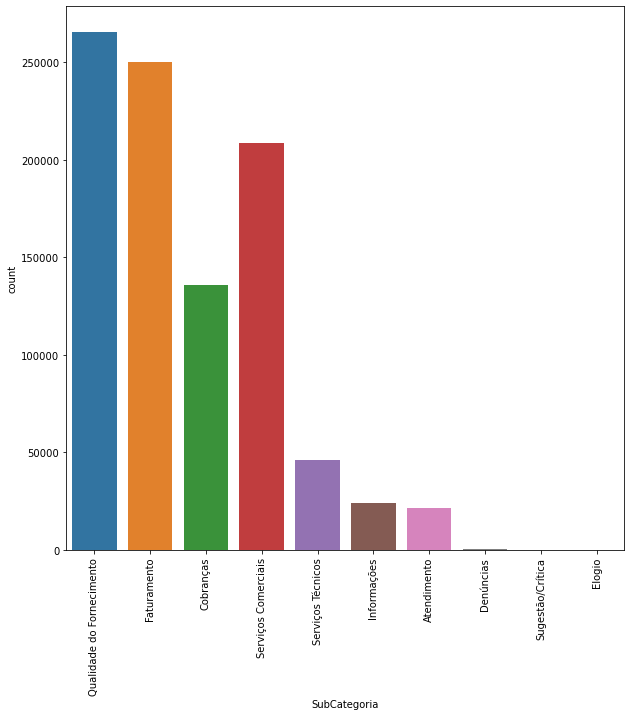

In [18]:
y = df.SubCategoria
plt.figure(figsize=(10,10))
sns.countplot(y,label="Contagem")
plt.xticks(rotation=90);

In [15]:
df[['Sigla','Numero_da_Solicitacao']].groupby(['Sigla']).agg(Qtde = pd.NamedAgg('Numero_da_Solicitacao','count'))

,Qtde
Sigla,
Amazonas Energia,15804
CEA,1141
CEB-Dis,12022
CEEE-D,38000
CPFL Paulista,49876
CPFL Piratininga,24205
CPFL Santa Cruz,5043
Celesc-Dis,11749
Celpe,52683


<AxesSubplot:xlabel='count', ylabel='Sigla'>

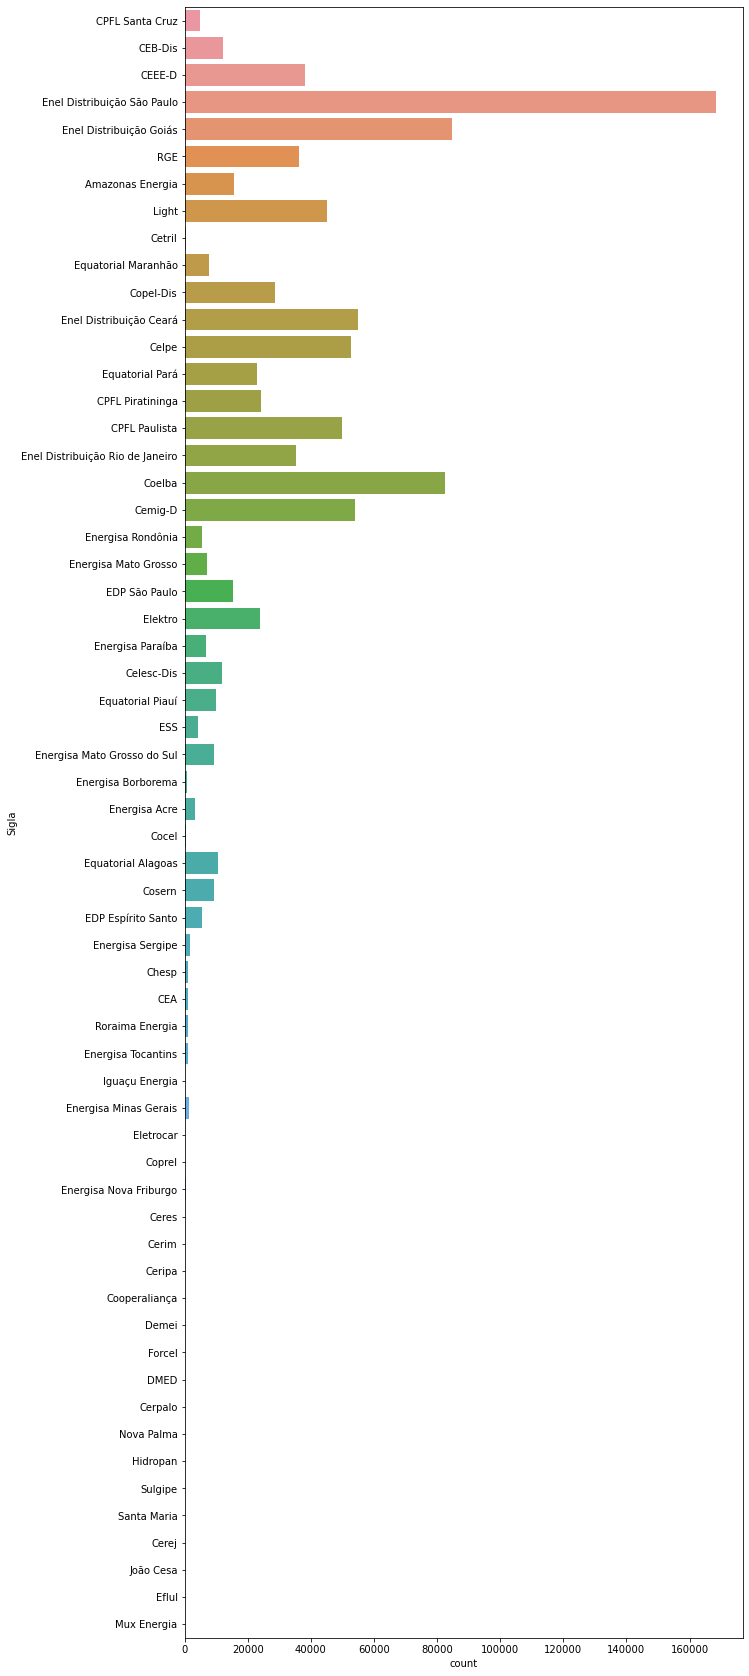

In [19]:
y = df.Sigla
plt.figure(figsize=(10,30))
sns.countplot(y=y)

In [20]:
sub = df[['Sigla','SubCategoria','Numero_da_Solicitacao']].groupby(['Sigla','SubCategoria']).count()

In [21]:
sub.reset_index(inplace=True)

In [22]:
sub.columns = ['Sigla','SubCategoria','Qtde']

<AxesSubplot:xlabel='Qtde', ylabel='Sigla'>

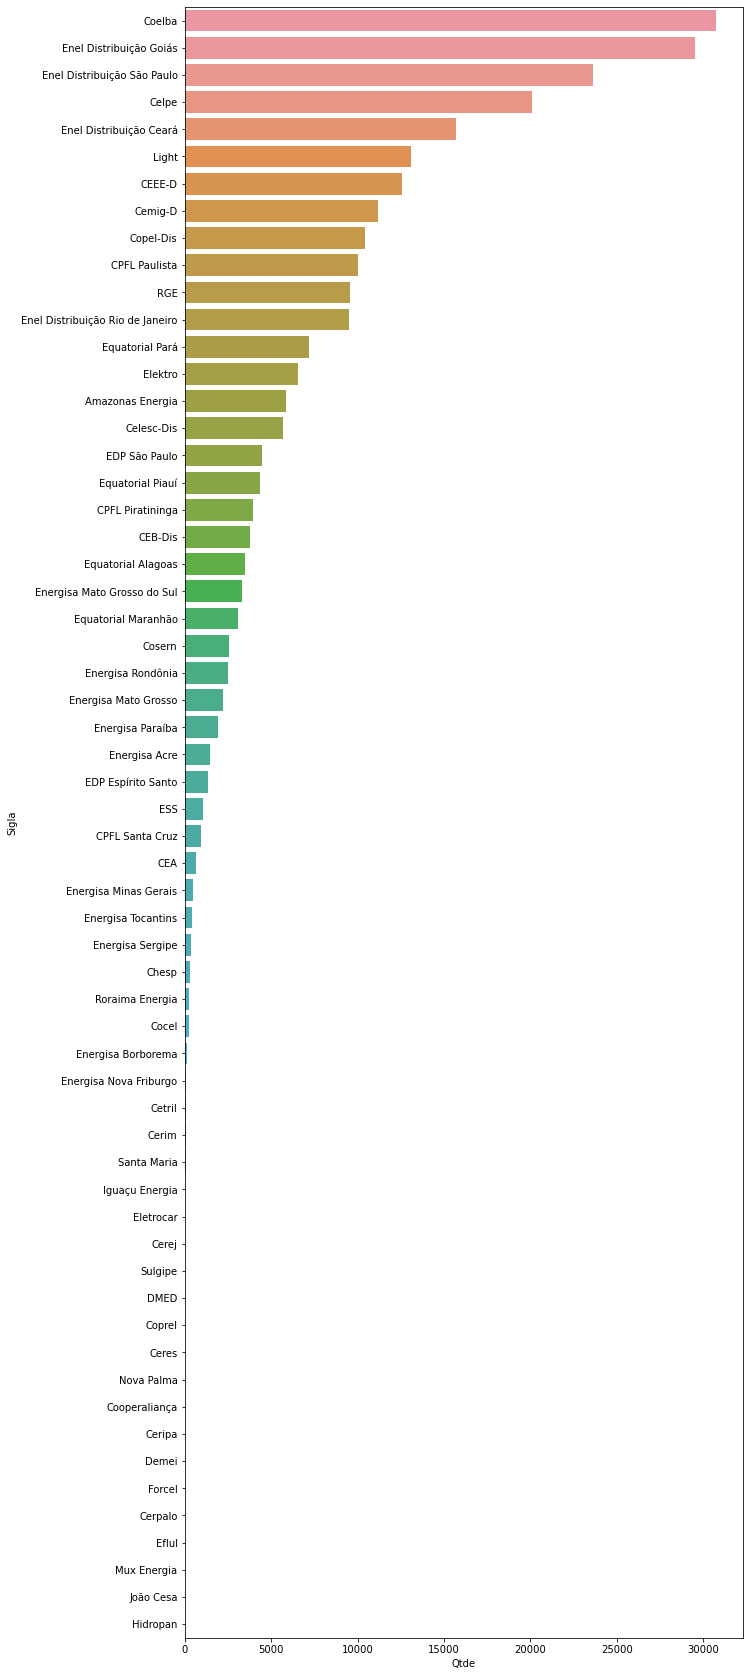

In [23]:
sub = sub.sort_values(['Qtde'],ascending=False).reset_index(drop=True)
plt.figure(figsize=(10,30))
sns.barplot(y=sub[sub['SubCategoria']=='Qualidade do Fornecimento'].Sigla, x=sub.Qtde)

### Relativização das reclamações

In [24]:
num = pd.read_excel('Numconsumidorescomtwitter.xlsx')

In [25]:
num.head()

,Ano,Mes,IdAgente,NomeAgente,Twitter,NumeroConsumidores,Soma Acumulada,Unnamed: 7
0,2020,12,4950,Cemig-D,NaN,8555705,8555705,0.099870
1,2020,12,390,Enel Distribuição São Paulo,NaN,7444845,16000550,0.186774
2,2020,12,47,Coelba,NaN,6173255,22173805,0.258834
3,2020,12,2866,Copel-Dis,NaN,4780506,26954311,0.314637
4,2020,12,63,CPFL Paulista,NaN,4603120,31557431,0.368369


In [31]:
rec = df[['IdAgente','Sigla','Numero_da_Solicitacao']][df['Categoria']=='Reclamações'].groupby(['IdAgente','Sigla']).agg(Qtde = pd.NamedAgg('Numero_da_Solicitacao','count'))

In [33]:
rec.reset_index(inplace=True)
rec.head()

,IdAgente,Sigla,Qtde
0,26,Energisa Acre,341
1,31,CEA,277
2,32,Energisa Tocantins,648
3,37,Equatorial Maranhão,2346
4,38,Equatorial Piauí,3013


In [45]:
qruc = pd.merge(rec,num,how='inner',on='IdAgente')

In [46]:
qruc.drop(['NomeAgente','Twitter','Ano', 'Mes','Soma Acumulada','Unnamed: 7'], axis=1, inplace=True)

In [47]:
qruc['qruc'] = qruc['Qtde']/qruc['NumeroConsumidores']*10000

In [48]:
qruc = qruc.sort_values(['qruc'],ascending=False).reset_index(drop=True)
qruc.head()

,IdAgente,Sigla,Qtde,NumeroConsumidores,qruc
0,382,Light,24414,3903561,62.542894
1,390,Enel Distribuição São Paulo,38666,7444845,51.936608
2,383,Enel Distribuição Rio de Janeiro,14192,2732992,51.928436
3,47,Coelba,19204,6173255,31.108386
4,39,Enel Distribuição Ceará,11590,3789080,30.587900


<AxesSubplot:xlabel='qruc', ylabel='Sigla'>

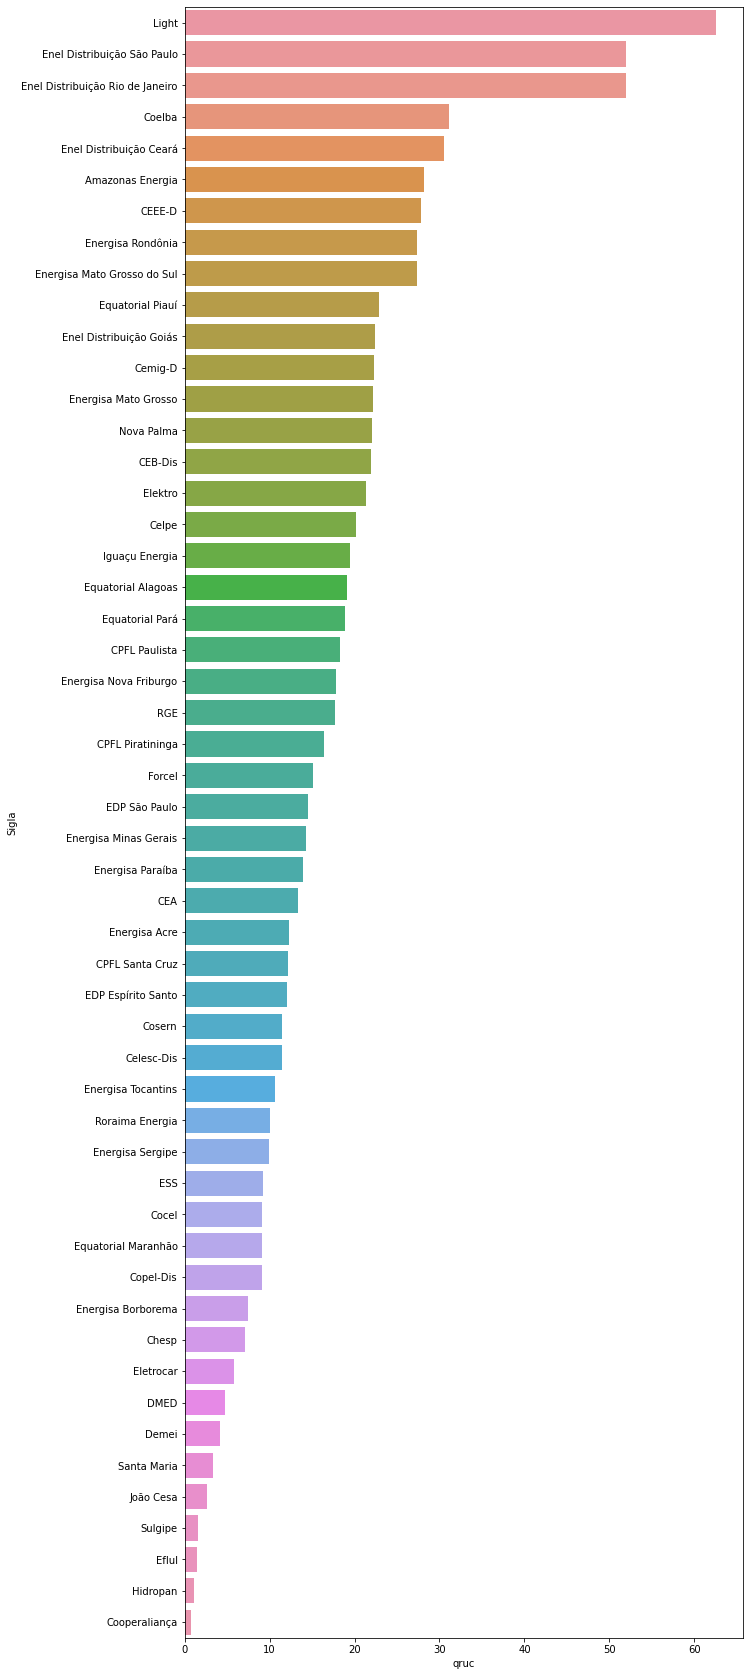

In [49]:
plt.figure(figsize=(10,30))
sns.barplot(y=qruc.Sigla, x=qruc.qruc)

In [50]:
qruc.to_csv('qruc.csv',encoding='utf-8')

In [86]:
df['dataref']= pd.to_datetime(df['dataref'], infer_datetime_format=True)  
df['dataref'].head()

0   2020-04-30
1   2020-08-10
2   2020-10-07
3   2020-09-22
4   2020-03-05
Name: dataref, dtype: datetime64[ns]

In [134]:
falta = df[df['Tipologia']=='Falta de Energia'].groupby(['dataref']).agg(Qtde = pd.NamedAgg('Numero_da_Solicitacao','count'))
danos = df[df['Tipologia']=='Ressarcimento de Danos Elétricos'].groupby(['dataref']).agg(Qtde = pd.NamedAgg('Numero_da_Solicitacao','count'))


In [135]:
falta.columns = ['falta']
danos.columns = ['danos']
corr = pd.merge(falta, danos,left_index=True, right_index=True, how='outer')

In [136]:
corr = corr.fillna(0)
corr.head(10)

,falta,danos
dataref,,
2020-01-01,3.0,0.0
2020-01-02,26.0,3.0
2020-01-03,19.0,4.0
2020-01-04,10.0,1.0
2020-01-05,2.0,0.0
2020-01-06,9.0,8.0
2020-01-07,16.0,2.0
2020-01-08,16.0,4.0
2020-01-09,24.0,4.0


C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


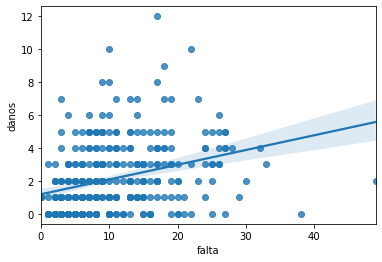

In [137]:
sns.regplot(corr['falta'], corr['danos']);

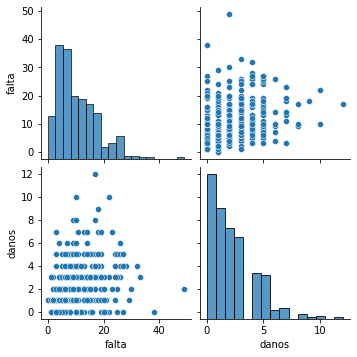

In [138]:
sns.pairplot(corr);

In [144]:
corr.corr()

,falta,danos
falta,1.000000,0.317333
danos,0.317333,1.000000


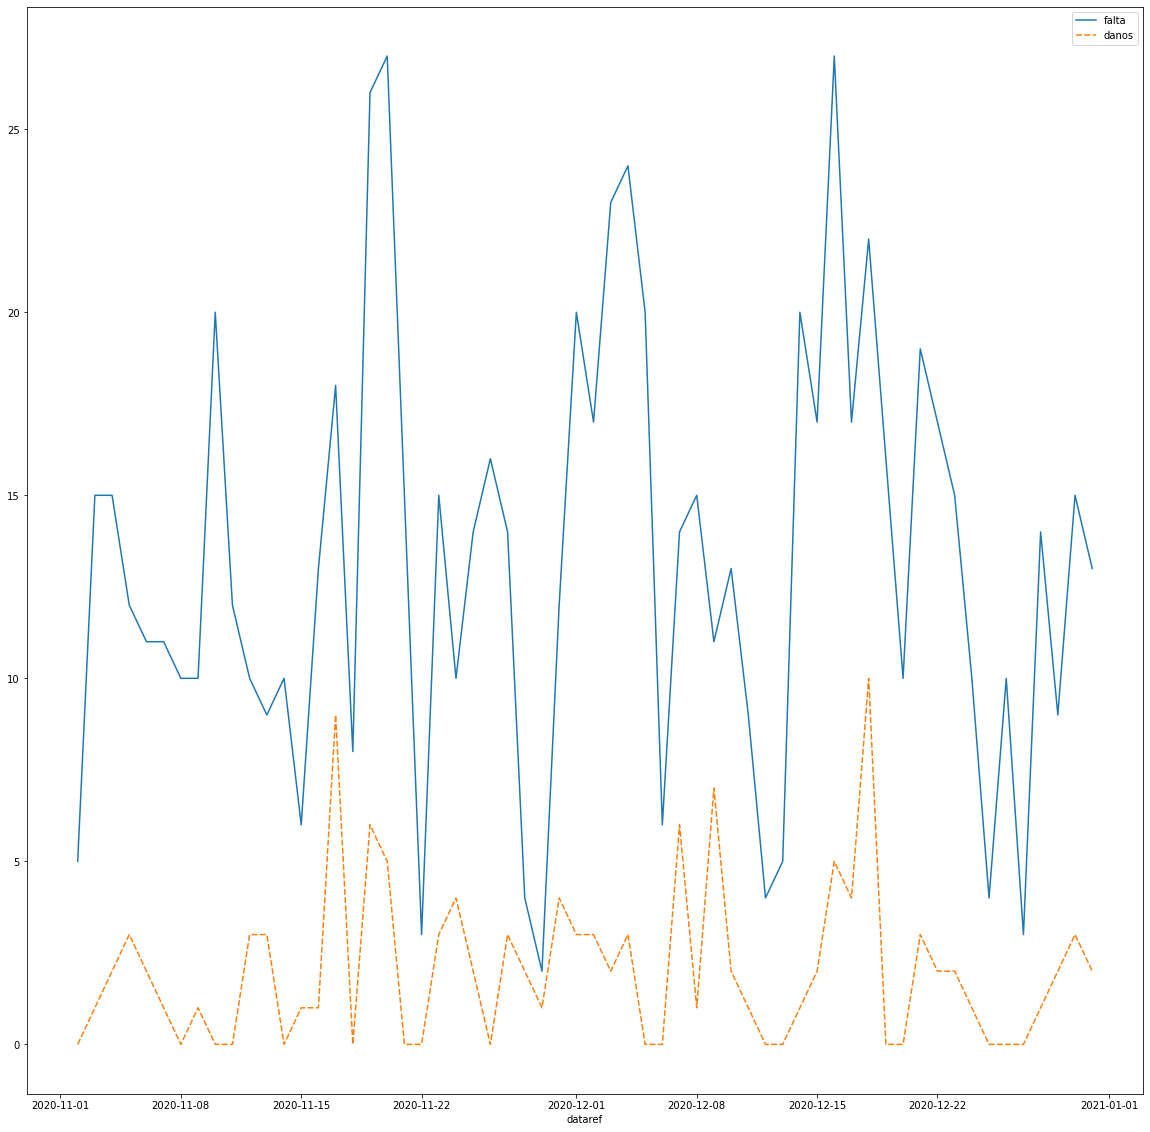

In [143]:
plt.figure(figsize=(20,20))
sns.lineplot(data=corr[corr.index>'2020-11-01']);

In [213]:
amapa = df[df['IdAgente']==31]
amapa = amapa.groupby(['AnoCriacao','MesCriacao','Categoria']).agg(Qtde = pd.NamedAgg('Numero_da_Solicitacao','count')).reset_index()

In [221]:
amapa['data'] = amapa['AnoCriacao'].astype(str)+'-'+amapa['MesCriacao'].astype(str)+'-01'

In [ ]:
amapa.drop(['AnoCriacao','MesCriacao'],axis=1,inplace=True)

In [227]:
amapa = pd.pivot(amapa,index='data',columns=['Categoria']).fillna(0)

In [228]:
amapa

Qtde            
Categoria  Informação Reclamações
data                             
2020-1-01          57          18
2020-10-01         48          43
2020-11-01        194          45
2020-12-01         32          31
2020-2-01          40          10
2020-3-01          49           7
2020-4-01         144          11
2020-5-01          69          14
2020-6-01          45          16
2020-7-01          76          36
2020-8-01          70          27
2020-9-01          40          19

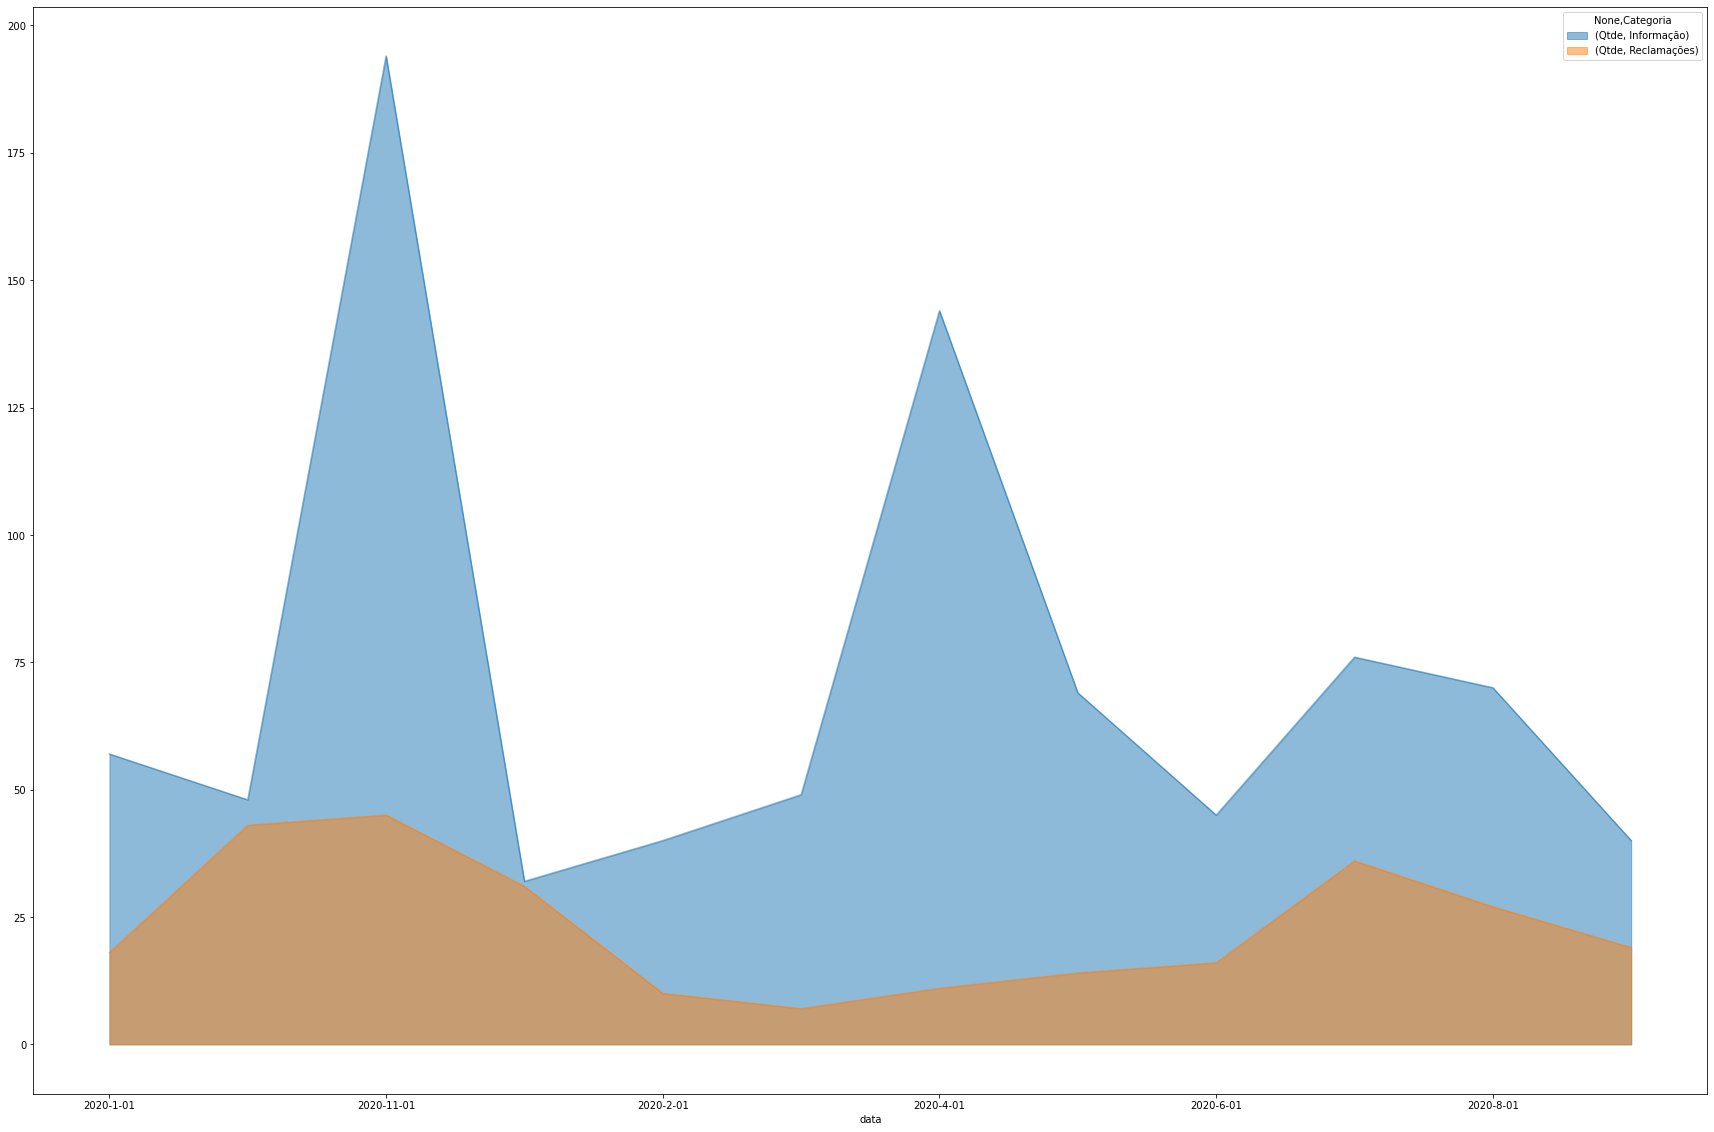

In [231]:
amapa.plot.area(figsize=(30,20), stacked= False);